### Setup

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.features import Rank1D, Rank2D

# Best parameter search, cross validation,scaling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score


In [2]:
# Load Data
dataset= pd.read_csv('redwine.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

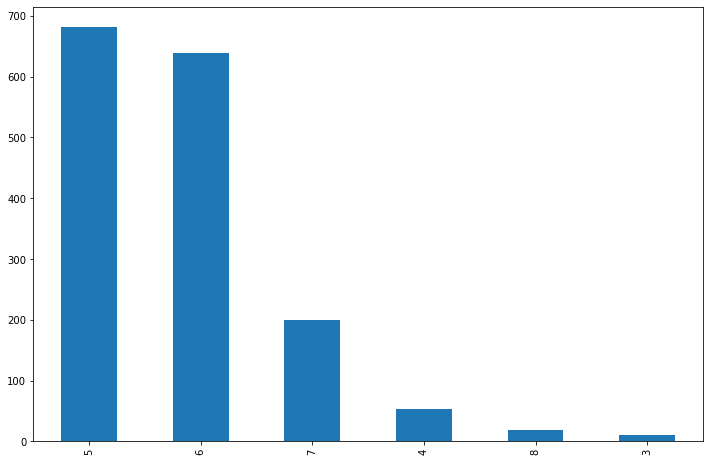

In [7]:
# quality(Target) distribution
plt.figure(figsize=(12,8))
dataset['quality'].value_counts().plot(kind='bar')

In [4]:
# shape of dataset
dataset.shape

(1599, 12)

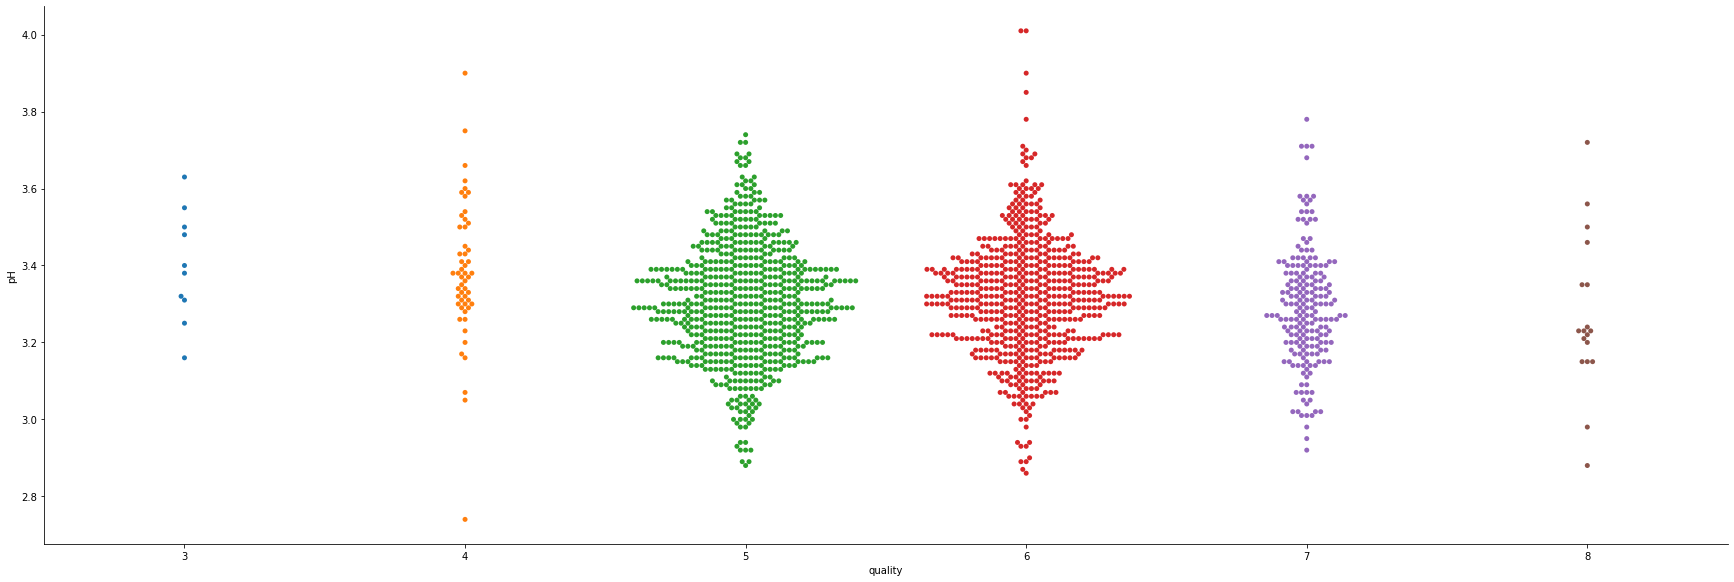

In [12]:
#sns.set(fontsize=2)
sns.catplot(data= dataset, x='quality', y='pH', kind='swarm', height=8, aspect=3)

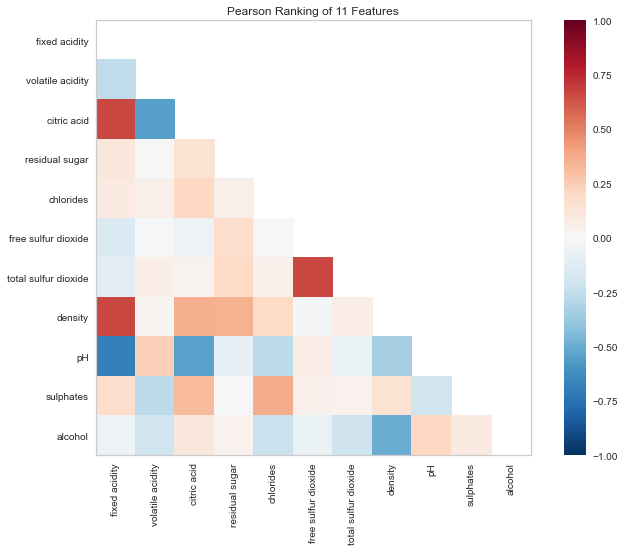

<AxesSubplot:title={'center':'Pearson Ranking of 11 Features'}>

In [26]:
# Detect colinear relationship
plt.figure(figsize=(12,8))
viz= Rank2D(algorithm= 'pearson')
viz.fit(features, label)
viz.transform(features)
viz.show()

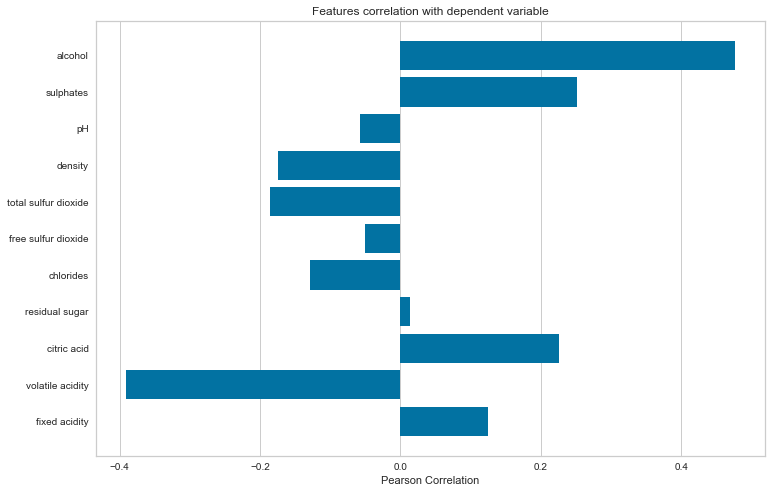

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [50]:
# Positive and Negative corelation
plt.figure(figsize=(12,8))
from yellowbrick.target import FeatureCorrelation
visualizer = FeatureCorrelation()

visualizer.fit(features, label)        
visualizer.show()

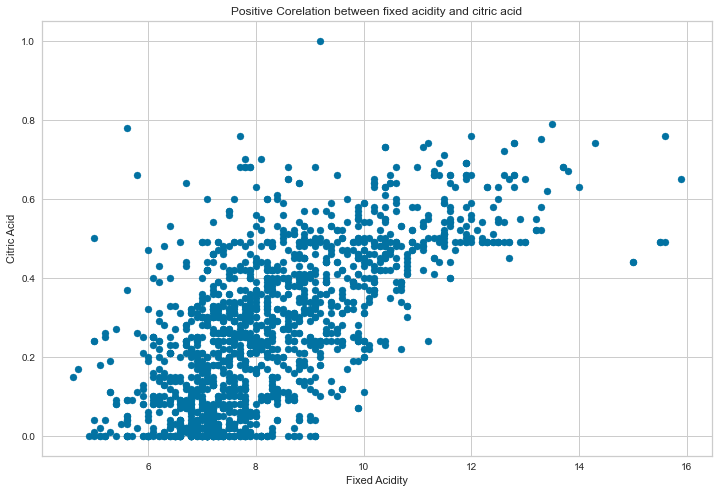

In [31]:
plt.figure(figsize=(12,8))

plt.scatter(dataset['fixed acidity'], dataset['citric acid'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.title('Positive Corelation between fixed acidity and citric acid')
plt.show()

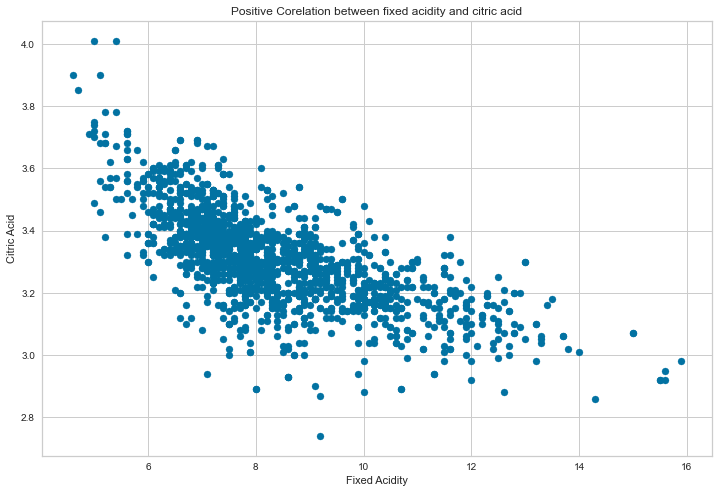

In [32]:
# Corelation between fixed acidity and pH
plt.figure(figsize=(12,8))

plt.scatter(dataset['fixed acidity'], dataset['pH'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.title('Negative Corelation between fixed acidity and pH')
plt.show()

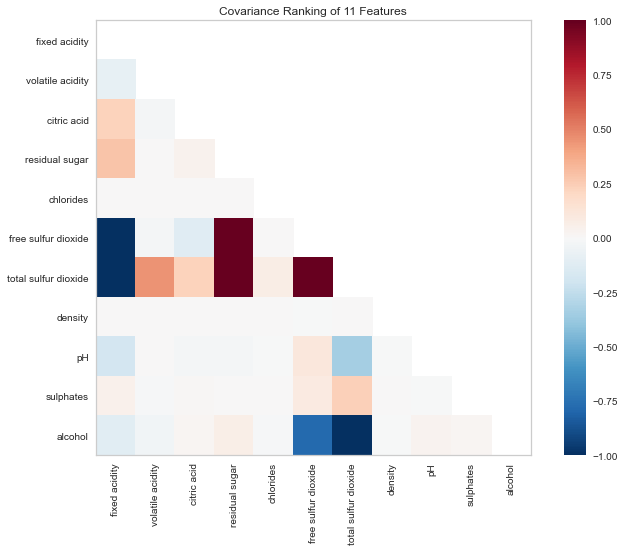

<AxesSubplot:title={'center':'Covariance Ranking of 11 Features'}>

In [33]:
# Covariance
plt.figure(figsize=(12,8))
viz= Rank2D(algorithm= 'covariance')
viz.fit(features, label)
viz.transform(features)
viz.show()

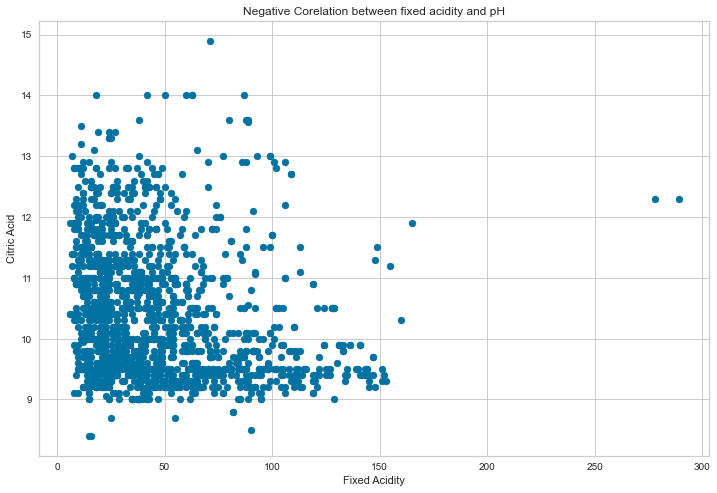

In [36]:
# Corelation between fixed acidity and pH
plt.figure(figsize=(12,8))

plt.scatter(dataset['total sulfur dioxide'], dataset['alcohol'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.title('Negative Corelation between fixed acidity and pH')
plt.show()

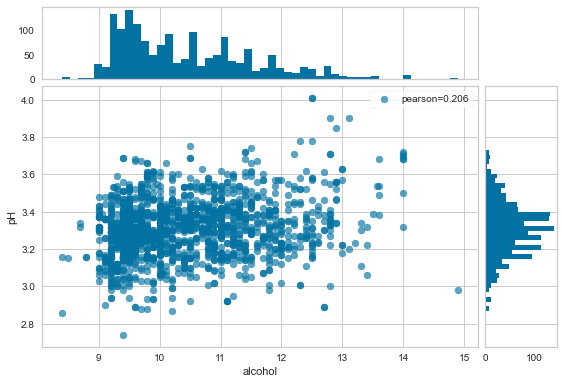

<AxesSubplot:xlabel='alcohol', ylabel='pH'>

In [46]:
from yellowbrick.features import JointPlotVisualizer


# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns=['alcohol', 'pH'])

visualizer.fit_transform(features, label)        
visualizer.show()

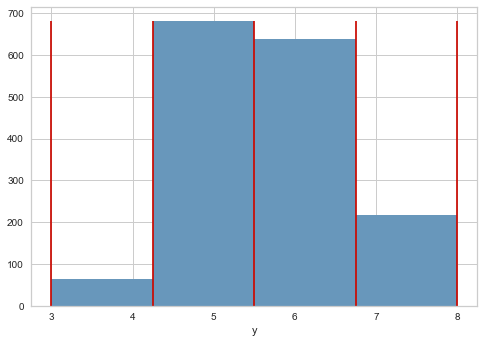

BalancedBinningReference(ax=<AxesSubplot:xlabel='y'>, target='y')

In [47]:
from yellowbrick.target import balanced_binning_reference
balanced_binning_reference(label)

### GradientBoostingClassifier

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
#label=dataset.pop('quality')
# Converting target into binary
#label= np.where(label>6, 1,0)
xtrain, xtest, ytrain, ytest= train_test_split(dataset, label, test_size=0.3)
clf= GradientBoostingClassifier(n_estimators=300,max_depth=3, learning_rate= 0.1)
clf.fit(xtrain, ytrain)
ypred=clf.predict(xtest)
print('Test Accuracy: ', clf.score(xtest, ytest))
print()
print('roc_auc_score: ', roc_auc_score(ytest, clf.predict_proba(xtest)[:, 1]))
print()
print(classification_report(ypred, ytest))
print()
confusion_matrix(ypred, ytest)

Test Accuracy:  0.9104166666666667

roc_auc_score:  0.8660667709963485

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.54      0.62      0.57        47

    accuracy                           0.91       480
   macro avg       0.75      0.78      0.76       480
weighted avg       0.92      0.91      0.91       480




array([[408,  25],
       [ 18,  29]])

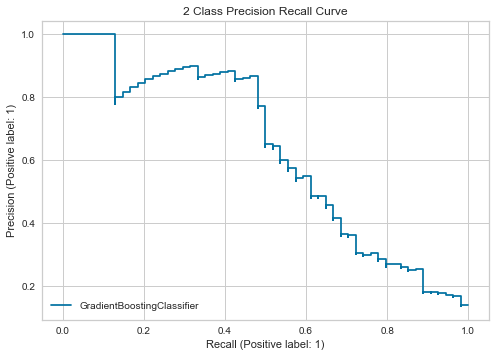

In [7]:
# precision recall curve of GradientBosstingClassifier
from sklearn.metrics import PrecisionRecallDisplay
disp=PrecisionRecallDisplay.from_estimator(clf,xtest, ytest, label= 'GradientBoostingClassifier')
_= disp.ax_.set_title('2 Class Precision Recall Curve')

### AdaBoostClassifier

In [31]:
# Parameters for AdaBoostClassifier
param_grid={
    'n_estimators': [50,100,200],
    'learning_rate': [0.01, 0.1, 1.0]
}
cv= StratifiedKFold(5)
clf= AdaBoostClassifier()
gsc= GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy')
gsc.fit(xtrain, ytrain)
print('Accuracy: ',gsc.cv_results_['mean_test_score'].mean())
print()
print('Classification Report\n\n', classification_report(ytest, gsc.predict(xtest)))
print()
confusion_matrix(ytest, gsc.predict(xtest))

Accuracy:  0.8653529610648445

Classification Report

               precision    recall  f1-score   support

           0       0.92      0.95      0.93       426
           1       0.47      0.37      0.41        54

    accuracy                           0.88       480
   macro avg       0.69      0.66      0.67       480
weighted avg       0.87      0.88      0.88       480




array([[403,  23],
       [ 34,  20]])

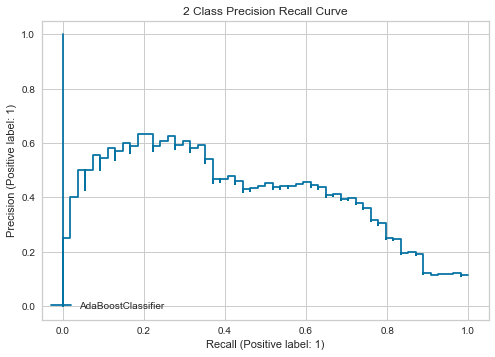

In [33]:
disp=PrecisionRecallDisplay.from_estimator(gsc,xtest, ytest, label= 'AdaBoostClassifier')
_= disp.ax_.set_title('2 Class Precision Recall Curve')

### ExtraTreesClassifier

In [41]:
import warnings
warnings.filterwarnings('ignore')
param_grid={
    'n_estimators':[50, 100, 200],
    'max_depth': [1,2,3],
    'criterion':['gini'],
}

clf= ExtraTreesClassifier()
cv= StratifiedKFold(5)
gsc=GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', error_score='raise')
gsc.fit(xtrain, ytrain)

print('Accuracy: ',gsc.cv_results_['mean_test_score'].mean())
print()
print('Classification Report\n\n', classification_report(ytest, gsc.predict(xtest)))
print()
confusion_matrix(ytest, gsc.predict(xtest))

Accuracy:  0.8544358139369348

Classification Report

               precision    recall  f1-score   support

           0       0.89      1.00      0.94       426
           1       0.00      0.00      0.00        54

    accuracy                           0.89       480
   macro avg       0.44      0.50      0.47       480
weighted avg       0.79      0.89      0.83       480




array([[426,   0],
       [ 54,   0]])

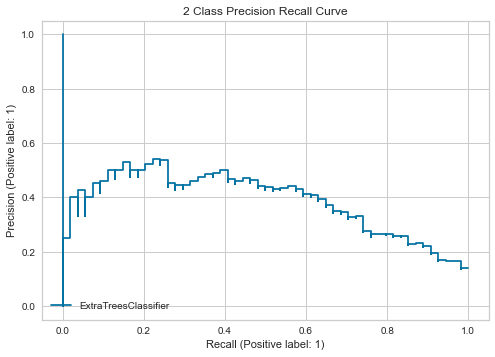

In [42]:
disp=PrecisionRecallDisplay.from_estimator(gsc,xtest, ytest, label= 'ExtraTreesClassifier')
_= disp.ax_.set_title('2 Class Precision Recall Curve')

### RandomForestClassifier

In [44]:
# model Building

param_grid={
    'max_depth': [ 1,2,4,6],
    'n_estimators': [50, 100,200 ]
    
}
rfc= RandomForestClassifier()
cv= StratifiedKFold(5)
gsc=GridSearchCV(rfc, param_grid, cv=cv, scoring='accuracy').fit(xtrain, ytrain)

print('Accuracy: ',gsc.cv_results_['mean_test_score'].mean())
print()
print('Classification Report\n\n', classification_report(ytest, gsc.predict(xtest)))
print()
confusion_matrix(ytest, gsc.predict(xtest))


Accuracy:  0.8674384075379029

Classification Report

               precision    recall  f1-score   support

           0       0.92      0.98      0.95       426
           1       0.67      0.37      0.48        54

    accuracy                           0.91       480
   macro avg       0.80      0.67      0.71       480
weighted avg       0.90      0.91      0.90       480




array([[416,  10],
       [ 34,  20]])

In [46]:
# Best parameters for RandomForestClassifier
gsc.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [48]:
# RandomForestClassifier with best parameter
rfc= RandomForestClassifier(n_estimators=100, max_depth=6)
rfc.fit(xtrain, ytrain)
print(rfc.score(xtest, ytest ))
confusion_matrix(ytest, rfc.predict(xtest))

0.9145833333333333


array([[418,   8],
       [ 33,  21]])

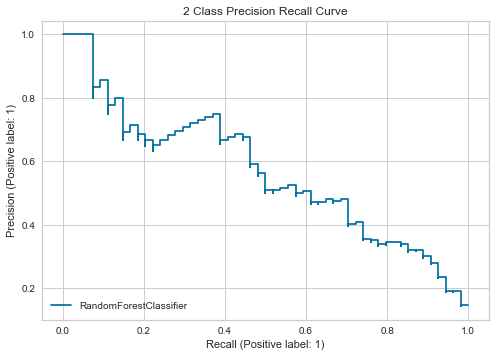

In [49]:
disp=PrecisionRecallDisplay.from_estimator(rfc,xtest, ytest, label= 'RandomForestClassifier')
_= disp.ax_.set_title('2 Class Precision Recall Curve')

### DecisionTreeClassifier

In [57]:
param_grid={
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'max_depth':[None, 1,2,3,4,5,6],
    'min_samples_split': [2,3,4],
    'max_features': ['sqrt', 'log2']

}

cv= StratifiedKFold(5)
clf= DecisionTreeClassifier()
gsc= GridSearchCV(clf, param_grid, cv= cv, scoring= 'accuracy')
gsc.fit(xtrain, ytrain)

print('Accuracy: ',gsc.cv_results_['mean_test_score'].mean())
print()
print('Classification Report\n\n', classification_report(ytest, gsc.predict(xtest)))
print()
confusion_matrix(ytest, gsc.predict(xtest))

Accuracy:  0.8595819605869253

Classification Report

               precision    recall  f1-score   support

           0       0.94      0.95      0.94       426
           1       0.56      0.52      0.54        54

    accuracy                           0.90       480
   macro avg       0.75      0.73      0.74       480
weighted avg       0.90      0.90      0.90       480




array([[404,  22],
       [ 26,  28]])

In [58]:
# best parameters for DecisionTreeClassifier
gsc.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_split': 2,
 'splitter': 'best'}

In [59]:
# DecisionTreeClassifier with parameter fit
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=None,
                           max_features='log2', min_samples_split=3, splitter='best')
dtc.fit(xtrain,ytrain)
dtc.score(xtest, ytest)


0.89375

In [60]:
# confusion_matrix on test dataset
confusion_matrix(ytest, dtc.predict(xtest))

array([[403,  23],
       [ 28,  26]])

### Conclusion
    We applied differnet algorithm on dataset with best parameter search and cross validation, all models perform well on the class '0' but did not perform well on class '1'. Only GradientBoostingClassifier predicted 60% class '1' correctly, it's overall accuracy is over 91% and f1, precision, recall score are nearly 95%.